In [1]:
import os
import pandas as pd
import csv
import numpy as np
import time

from datetime import datetime
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted_data_path_custom_model = "/home/aayush/accelerometer/random-22/30-epoch"

Remember the model used here has been trained using 100 participants for training data and remaining 50 as test data. Previously, used model was trained on 150 participants.

In [2]:
def get_files(data_path, predicted_files=False, annotated_files=False) -> None:
    total_csv_zipped = []
    for path, dirnames, filenames in os.walk(data_path):
        for file in filenames:
            if file.endswith(".csv.gz") and predicted_files:
                # paths contains the base directory for that file.
                # dirnames contains other directories within this folder.
                # filenames contains the list of filenames within path.
                total_csv_zipped.append(os.path.join(path, file))
                
            if file.endswith(".csv") and annotated_files and file[0]!='c': #ignore the capture24 file
                # paths contains the base directory for that file.
                # dirnames contains other directories within this folder.
                # filenames contains the list of filenames within path.
                total_csv_zipped.append(os.path.join(path, file))
                
    return sorted(total_csv_zipped)

In [3]:
acc_process_files = get_files(predicted_data_path_custom_model, predicted_files=True)

In [4]:
def parse_datetime_df_time(dt_string):
    clean_datetime_str = dt_string.split('[')[0].strip()
    clean_datetime_str = clean_datetime_str.split('+')[0].strip()
    dt_object = pd.to_datetime(clean_datetime_str)
    return dt_object

In [5]:
# get participant ID
combined_df = []
for _ in acc_process_files:
    id = _.split("/")[-1].split("_")[0]
    predicted_df = pd.read_csv(_)
    # Convert to datetime object
    df_cleaned_time = predicted_df['time'].apply(parse_datetime_df_time)
    predicted_df['time'] = df_cleaned_time
    predicted_df['participant'] = float(id)
    combined_df.append(predicted_df)
    

In [6]:
predicted_df = pd.concat(combined_df)
# retrieve only the activities headers
activities = predicted_df[predicted_df.columns.values.tolist()[2:6]]

# whichever activity is depicted by 1, use it as the predicted activity
out = activities[activities==1].idxmax(axis=1)
predicted_df["activity_predicted"] = out

In [8]:
acc_process_files

['/home/aayush/accelerometer/random-22/30-epoch/1049632_90001_0_0-timeSeries.csv.gz',
 '/home/aayush/accelerometer/random-22/30-epoch/1258914_90001_0_0-timeSeries.csv.gz',
 '/home/aayush/accelerometer/random-22/30-epoch/1258914_90001_1_0-timeSeries.csv.gz',
 '/home/aayush/accelerometer/random-22/30-epoch/1258914_90001_2_0-timeSeries.csv.gz',
 '/home/aayush/accelerometer/random-22/30-epoch/1258914_90001_3_0-timeSeries.csv.gz',
 '/home/aayush/accelerometer/random-22/30-epoch/1258914_90001_4_0-timeSeries.csv.gz',
 '/home/aayush/accelerometer/random-22/30-epoch/1389164_90001_0_0-timeSeries.csv.gz',
 '/home/aayush/accelerometer/random-22/30-epoch/1604871_90001_0_0-timeSeries.csv.gz',
 '/home/aayush/accelerometer/random-22/30-epoch/1627101_90001_0_0-timeSeries.csv.gz',
 '/home/aayush/accelerometer/random-22/30-epoch/1849303_90001_0_0-timeSeries.csv.gz',
 '/home/aayush/accelerometer/random-22/30-epoch/1930576_90001_0_0-timeSeries.csv.gz',
 '/home/aayush/accelerometer/random-22/30-epoch/228262

In [7]:
predicted_df

,time,acc,light,moderate-vigorous,sedentary,sleep,CpSB,CpLPA,CpMPA,CpVPA,CpMVPA,MET,participant,activity_predicted
0,2015-01-29 10:00:02.944,1.669,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.563492,1049632.0,sedentary
1,2015-01-29 10:00:32.944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1049632.0,NaN
2,2015-01-29 10:01:02.944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1049632.0,NaN
3,2015-01-29 10:01:32.944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1049632.0,NaN
4,2015-01-29 10:02:02.944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1049632.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20154,2015-01-21 09:57:06.994,9.835,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.563492,5518221.0,sedentary
20155,2015-01-21 09:57:36.994,32.735,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.563492,5518221.0,sedentary
20156,2015-01-21 09:58:06.994,25.315,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.563492,5518221.0,sedentary
20157,2015-01-21 09:58:36.994,3.618,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.563492,5518221.0,sedentary


In [9]:
# drop na
predicted_df_nna = predicted_df.dropna(subset=["activity_predicted"])

In [10]:
predicted_df.to_csv("/home/aayush/accelerometer/random-22/comparison/30-sec-random22-predicted.csv", index=False)

In [11]:
predicted_df_nna

,time,acc,light,moderate-vigorous,sedentary,sleep,CpSB,CpLPA,CpMPA,CpVPA,CpMVPA,MET,participant,activity_predicted
0,2015-01-29 10:00:02.944,1.669,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.563492,1049632.0,sedentary
705,2015-01-29 15:52:32.944,3.181,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.563492,1049632.0,sedentary
706,2015-01-29 15:53:02.944,45.651,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.563492,1049632.0,sedentary
707,2015-01-29 15:53:32.944,18.126,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.563492,1049632.0,sedentary
708,2015-01-29 15:54:02.944,0.075,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.563492,1049632.0,sedentary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20154,2015-01-21 09:57:06.994,9.835,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.563492,5518221.0,sedentary
20155,2015-01-21 09:57:36.994,32.735,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.563492,5518221.0,sedentary
20156,2015-01-21 09:58:06.994,25.315,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.563492,5518221.0,sedentary
20157,2015-01-21 09:58:36.994,3.618,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.563492,5518221.0,sedentary


In [12]:
# group by gives a dictionary object with the distinct values from the by column as the keys
# group_keys will set those keys as the index of the resulting dataframe
predicted_proportions = predicted_df_nna.groupby("participant", group_keys=True)["activity_predicted"].value_counts(normalize=True).unstack()
predicted_proportions.head()
print(predicted_proportions.index)

Float64Index([1049632.0, 1258914.0, 1389164.0, 1604871.0, 1627101.0, 1849303.0,
              1930576.0, 2282621.0, 2412698.0, 2582967.0, 2636046.0, 2939138.0,
              3104598.0, 3227093.0, 3393164.0, 3549612.0, 3692498.0, 3913143.0,
              3985149.0, 4863049.0, 5425296.0, 5518221.0],
             dtype='float64', name='participant')


In [13]:
# weekly data proportions
weekly_df = pd.read_csv("/home/aayush/accelerometer/random-22/random-22/random-2.txt")
weekly_df = weekly_df[["eid", "40048-0.0", "40049-0.0", "40047-0.0", "40046-0.0"]]
weekly_df = weekly_df.rename(columns={"40048-0.0": "light", "40049-0.0": "moderate-vigorous", "40047-0.0": "sedentary", "40046-0.0": "sleep"})
weekly_df["sum_proportions"] = weekly_df[weekly_df.columns.tolist()[1:]].sum(axis=1)
weekly_df["eid"] = weekly_df["eid"].astype("float")
weekly_df.sort_values(by=["eid"], inplace=True, ignore_index=True)
weekly_df.head()

,eid,light,moderate-vigorous,sedentary,sleep,sum_proportions
0,1049632.0,0.13864,0.00974,0.49725,0.35438,1.00001
1,1258914.0,0.17411,0.00000,0.51003,0.31586,1.00000
2,1389164.0,0.18487,0.02136,0.45476,0.33900,0.99999
3,1604871.0,0.18955,0.04132,0.42003,0.34909,0.99999
4,1627101.0,0.22879,0.01880,0.38300,0.36940,0.99999


In [14]:
weekly_df = weekly_df.set_index("eid")
df = predicted_proportions.join(weekly_df, lsuffix='_predicted', rsuffix='_weekly_actual')

In [15]:
df

,light_predicted,moderate-vigorous_predicted,sedentary_predicted,sleep_predicted,light_weekly_actual,moderate-vigorous_weekly_actual,sedentary_weekly_actual,sleep_weekly_actual,sum_proportions
participant,,,,,,,,,
1049632.0,0.047308,0.036069,0.565865,0.350758,0.13864,0.00974,0.49725,0.35438,1.00001
1258914.0,0.050925,0.174562,0.544397,0.230116,0.17411,0.00000,0.51003,0.31586,1.00000
1389164.0,0.161417,0.035422,0.488937,0.314223,0.18487,0.02136,0.45476,0.33900,0.99999
1604871.0,0.009078,0.187807,0.455529,0.347587,0.18955,0.04132,0.42003,0.34909,0.99999
1627101.0,0.018884,0.148812,0.474461,0.357842,0.22879,0.01880,0.38300,0.36940,0.99999
1849303.0,0.028597,0.164547,0.467407,0.339448,0.21996,0.01592,0.39572,0.36839,0.99999
1930576.0,0.085645,0.249016,0.298749,0.366589,0.19830,0.11753,0.30984,0.37433,1.00000
2282621.0,0.174735,0.225734,0.584817,0.014714,0.29246,0.00444,0.58878,0.11431,0.99999
2412698.0,0.031698,0.012054,0.525671,0.430577,0.08478,0.00446,0.44146,0.46929,0.99999


In [16]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Perform paired t-tests
results = {col: stats.ttest_rel(df[col+'_predicted'], df[col+'_weekly_actual']) for col in ['light', 'moderate-vigorous', 'sedentary', 'sleep']}

print(results)

{'light': Ttest_relResult(statistic=-9.015426030830538, pvalue=1.1518607817971637e-08), 'moderate-vigorous': Ttest_relResult(statistic=nan, pvalue=nan), 'sedentary': Ttest_relResult(statistic=5.7509324318418145, pvalue=1.0425295284223292e-05), 'sleep': Ttest_relResult(statistic=-4.616777711823456, pvalue=0.00014881893188013843)}


In [17]:
print("t-values from paired t-tests:")
for activity, result in results.items():
    print(f"{activity}: {result.statistic:.4f}")

print("P-values from paired t-tests:")
for activity, result in results.items():
    print(f"{activity}: {result.pvalue:.4f}")

t-values from paired t-tests:
light: -9.0154
moderate-vigorous: nan
sedentary: 5.7509
sleep: -4.6168
P-values from paired t-tests:
light: 0.0000
moderate-vigorous: nan
sedentary: 0.0000
sleep: 0.0001


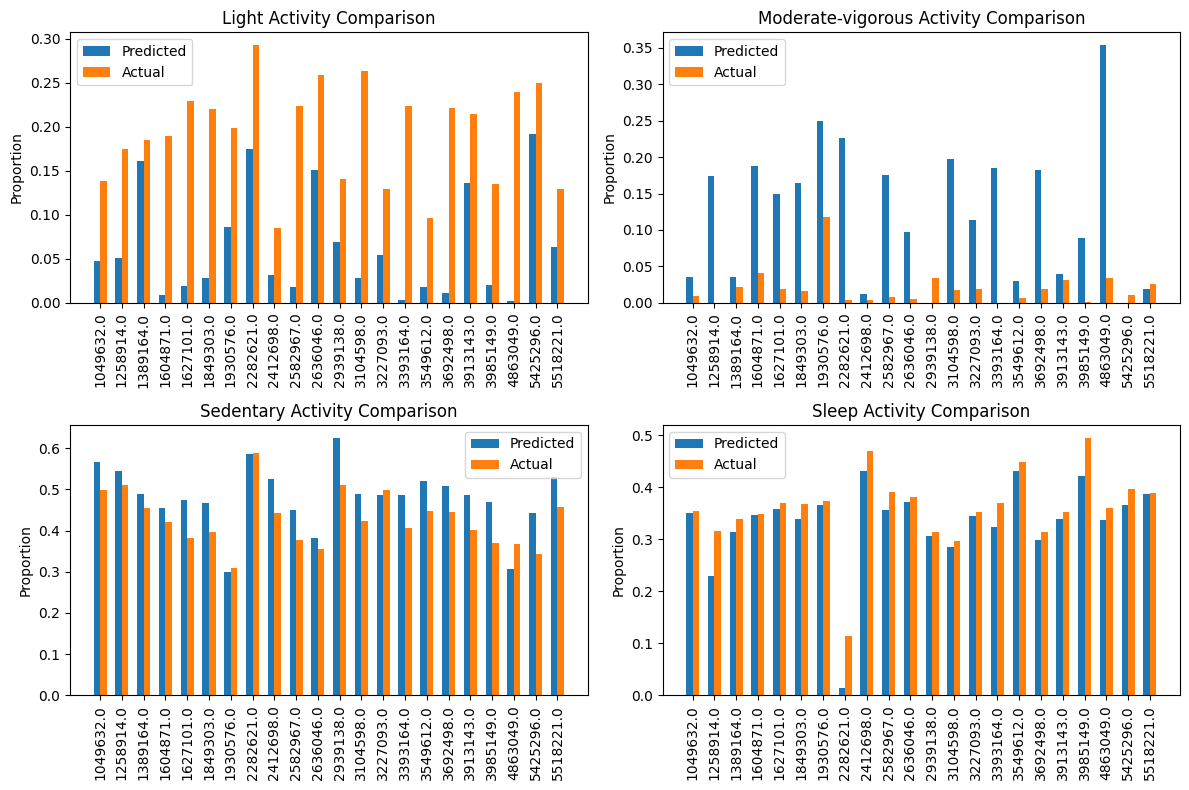

In [18]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame which has been previously defined
# and it contains both 'predicted' and 'actual' values for each activity.
# Here we adjust the column names as necessary.
activities = ['light', 'moderate-vigorous', 'sedentary', 'sleep']
suffixes = ['_predicted', '_weekly_actual']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjust the subplot grid if necessary

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each activity and each set of axes
for ax, activity in zip(axes, activities):
    # Positions for the bars
    positions = list(range(len(df)))  # This will be the number of participants
    # Plot predicted values
    ax.bar([p - 0.15 for p in positions], df[activity + suffixes[0]], width=0.3, label='Predicted')
    # Plot actual values
    ax.bar([p + 0.15 for p in positions], df[activity + suffixes[1]], width=0.3, label='Actual')
    
    # Set title, labels etc.
    ax.set_title(f'{activity.capitalize()} Activity Comparison')
    ax.set_xticks(positions)
    ax.set_xticklabels(df.index, rotation=90)
    ax.set_ylabel('Proportion')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


#### T-value:

The t-value is a measure of the difference between two means relative to the variation in the sample data.
- A positive t-value indicates that the first mean (in your case, the predicted values) is larger than the second mean (the actual values).
- A negative t-value indicates that the first mean is smaller than the second mean.

#### p-value
The p-value is a measure used in statistical hypothesis testing, specifically to determine the significance of the results from a statistical test. Here's a step-by-step breakdown of what it represents and how to interpret it:

Null Hypothesis (H0): In your case, the null hypothesis for each paired t-test is that there is no difference between the predicted and actual values for a specific activity category. This means that any observed difference is due to random chance or sampling error.

Alternative Hypothesis (H1): The alternative hypothesis is that there is a difference between the predicted and actual values.

Calculating the P-value: The p-value is calculated from the t-test and it represents the probability of observing your data, or data more extreme than yours, assuming that the null hypothesis is true.


#### Interpreting the P-value:

- Low P-value (< 0.05 usually): A low p-value indicates that the observed data (or more extreme) would be very unlikely under the null hypothesis. In practical terms, a low p-value means that the evidence is strong enough to reject the null hypothesis. Thus, you conclude that there is a statistically significant difference between the predicted and actual values.

- High P-value (≥ 0.05): A high p-value suggests that the observed data is not unusual under the null hypothesis. In other words, any difference between the predicted and actual values could easily occur by random chance alone. Therefore, you fail to reject the null hypothesis, indicating that the evidence is not strong enough to support a conclusion of a significant difference.

#### Results Interpretation
Light Activity:

T-value: 5.4489 (Positive)
P-value: 0.0000
Interpretation: There is a statistically significant difference between the predicted and actual values for light activity, with the predicted values being higher on average. The extremely low p-value (0.0000) strongly supports the rejection of the null hypothesis.
Moderate-Vigorous Activity:

T-value: -1.0874 (Negative)
P-value: 0.2892
Interpretation: The negative t-value indicates that the actual values are slightly higher than the predicted values, on average. However, the p-value is above 0.05, suggesting that this difference is not statistically significant. The null hypothesis cannot be rejected for moderate-vigorous activity.
Sedentary Activity:

T-value: 3.6646 (Positive)
P-value: 0.0014
Interpretation: There is a statistically significant difference, with predicted values being higher than actual values for sedentary activity. The p-value (0.0014) indicates strong evidence against the null hypothesis.
Sleep:

T-value: -6.1074 (Negative)
P-value: 0.0000
Interpretation: The actual sleep values are significantly higher than the predicted ones, as indicated by the negative t-value. The very low p-value (0.0000) strongly rejects the null hypothesis, indicating a significant difference.